In [1]:
MODEL_PATH = '/home/anhphantq/meowmeow'

MODEL_VERSION = '5'



In [2]:
from catboost import CatBoostRanker
click_models = []
NUM_SPLITS = 5
NUM_SAMPLES = 3
for fold in range(NUM_SPLITS):
  for i in range(NUM_SAMPLES):
    click_model = CatBoostRanker()
    click_model.load_model(MODEL_PATH + '/clicks_only_' + MODEL_VERSION + f'/meowmewo_fold{fold}_sample{i}')

    assert click_model.is_fitted
    click_models.append(click_model)

cart_models = []
for fold in range(NUM_SPLITS):
  for i in range(NUM_SAMPLES):
    cart_model = CatBoostRanker()
    cart_model.load_model(MODEL_PATH + '/carts_only_'+ MODEL_VERSION + f'/meowmewo_fold{fold}_sample{i}')
    assert cart_model.is_fitted
    cart_models.append(cart_model)

order_models = []
for fold in range(NUM_SPLITS):
  for i in range(NUM_SAMPLES):
    order_model = CatBoostRanker()
    order_model.load_model(MODEL_PATH + '/orders_only_'+ MODEL_VERSION + f'/meowmewo_fold{fold}_sample{i}')
    assert order_model.is_fitted
    order_models.append(order_model)

In [3]:
import pandas as pd 
from catboost import Pool
pool1 = Pool(pd.read_parquet('/home/anhphantq/vdb/cache_train/data_0.parquet').iloc[:,2:])

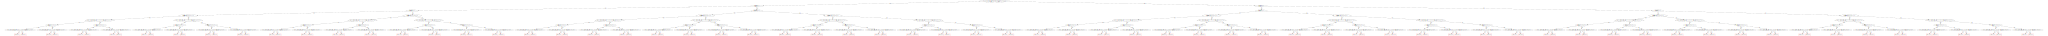

In [5]:
order_model.plot_tree(0, pool1)